In [30]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import scipy.optimize as optimize

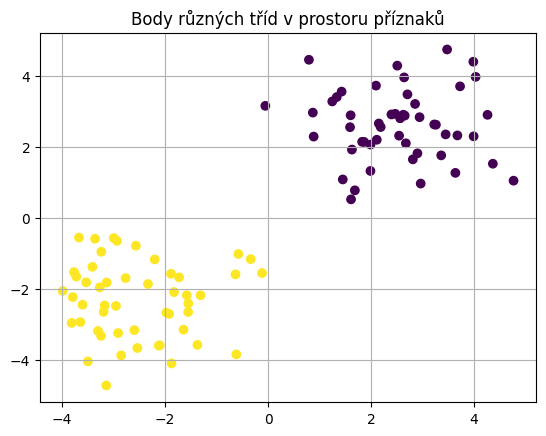

In [31]:
# Generování bodů
X, y = make_blobs(
    n_samples=100, centers=[(2.5, 2.5), (-2.5, -2.5)], n_features=2, random_state=0
)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid()
plt.title("Body různých tříd v prostoru příznaků")
plt.show()

In [38]:
class naivni_logisticka_regrese_binarni:
    def __init__(self):
        self._w = None
        self._X = None
        self._y = None
        self._regularization = False

    def sigmoida(self, w, X):
        """
        Pomocna metoda pro vypocet sigmoidy
        """
        return 1.0 / (1.0 + np.exp(-X @ w))

    def kriterialni_funkce_bez_regularizace(self, w):
        return -(
            self._y.T @ np.log(self.sigmoida(w, self._X))
            + (1 + self._y).T @ np.log(1 - self.sigmoida(w, self._X))
        )

    def kriterialni_funkce_s_regularizaci(self, w):
        return self.kriterialni_funkce_bez_regularizace(w) + self._c * np.sum(w**2)

    def fit(self, X, y, c=0.001, regularization=False):
        """
        Nauceni modelu. Pro uceni je vyuzita knihovna scipy a nastroje pro
        optimalizaci v ni obsazene.
        """
        self._c = c
        self._regularization = regularization

        dimenze = X.shape[1] + 1
        radky = X.shape[0]
        # priprav si data - pridani sloupce se jednickami, pro bias
        self._X = np.hstack((np.ones((radky, 1)), X))  # pridej jednicky
        self._y = y
        # je pouzita iteracni metoda optimalizace, nahodne je zvolena nulta iterace
        w0 = np.random.randn(dimenze)  # nahodny bod
        self._w = w0
        print(
            f"Pocatecni hodnota krit. fce {self.kriterialni_funkce_bez_regularizace(w0)}"
        )
        print(f"Pocatecni hodnota vah w={w0}")

        if regularization:
            res = optimize.minimize(
                self.kriterialni_funkce_s_regularizaci, w0, method="BFGS", tol=1e-5
            )
        else:
            res = optimize.minimize(
                self.kriterialni_funkce_bez_regularizace, w0, method="BFGS", tol=1e-5
            )

        self._w = res.x
        print(
            f"Konecna hodnota krit. fce {self.kriterialni_funkce_bez_regularizace(self._w)}"
        )
        print(f"Konecna hodnota vah w={self._w}")
        return self._w

    def predict_proba(self, X):
        """
        Vypocet pravdepodobnosti prislusnosti ke tride
        """
        return self.sigmoida(self._w, np.hstack((np.ones((X.shape[0], 1)), X)))

    def predict(self, X, hranice=0.5):
        """
        Predikce konkretni tridy na zaklade pravdepodobnosti.
        """
        pravdepodobnost = self.predict_proba(X)
        return 1 * (pravdepodobnost > hranice)

In [40]:
# Pouziti navrzene tridy
model = naivni_logisticka_regrese_binarni()
model.fit(
    X,
    y,
)  # nauceni modelu

# Pouziti pro predikci
bod = np.array([4, 2])
y_1_hat = model.predict(bod.reshape(1, 2))
print(f"Predikovana trida pro {bod} je {y_1_hat}")

y_hat = model.predict(X)
print("Porovnani s realitou:")
for trida_predpoved, realita in zip(y_hat, y):
    print(f"{trida_predpoved}-->{realita}|", end="")

Pocatecni hodnota krit. fce 150.91738010477633
Pocatecni hodnota vah w=[-1.74727613 -0.31650303 -0.77985986]
Konecna hodnota krit. fce 99.6210239725711
Konecna hodnota vah w=[-2.03299101 -0.27610221 -0.24385882]
Predikovana trida pro [4 2] je [0]
Porovnani s realitou:
0-->0|0-->1|0-->0|0-->1|0-->1|0-->0|0-->0|0-->1|0-->0|0-->0|0-->1|0-->0|0-->1|0-->1|0-->1|0-->0|0-->1|0-->1|0-->1|0-->1|0-->1|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->1|0-->0|0-->0|0-->1|0-->1|0-->1|0-->1|0-->1|0-->0|0-->1|0-->1|0-->0|0-->1|0-->1|0-->1|0-->1|0-->0|0-->0|0-->0|0-->0|0-->1|0-->0|0-->0|0-->0|0-->0|0-->0|0-->1|0-->0|0-->1|0-->1|0-->1|0-->1|0-->1|0-->1|0-->1|0-->0|0-->0|0-->0|0-->1|0-->1|0-->0|0-->0|0-->1|0-->0|0-->1|0-->0|0-->0|0-->0|0-->1|0-->0|0-->1|0-->1|0-->1|0-->1|0-->0|0-->1|0-->1|0-->0|0-->1|0-->0|0-->1|0-->0|0-->0|0-->0|0-->1|0-->0|0-->0|0-->1|0-->0|0-->1|0-->0|

In [41]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Příklad dat
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 0, 1, 1])

# Vytvoření modelu
model = LogisticRegression()

# Naucení modelu
model.fit(X, y)

# Predikce pro konkrétní bod
bod = np.array([[4, 2]])
y_1_hat = model.predict(bod)
print(f"Predikovaná třída pro {bod.flatten()} je {y_1_hat[0]}")

# Predikce pro všechna data
y_hat = model.predict(X)

# Porovnání s realitou
print("Porovnání s realitou:")
for trida_predpoved, realita in zip(y_hat, y):
    print(f"{trida_predpoved} --> {realita} |", end="")

Predikovaná třída pro [4 2] je 0
Porovnání s realitou:
0 --> 0 |0 --> 0 |0 --> 0 |1 --> 1 |1 --> 1 |